### Scikit Learn GridSearchCV   

Johnathan Clementi   
25 March, 2022   
University of Pennsylvania, Master of Urban Spatial Analytics   
Remote Sensing - MUSA 650 - Spring 2022   


The hyper-parameters of a machine learning model are user specified variables that can be adjusted in order to improve the performance of the model. However, there is no way to know in advance the optimal values for each hyper-parameter. The process of choosing optimal hyper-parameters involves comparing the decision metrics of models with a different hyper-parameter (or combination of hyper-parameters). [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) is a form of Scikit-Learn function which iterates through an exhaustive grid of hyper-parameter combinations, trains a model using those parameters, and then selects the best hyper-parameter combination based on a scoring function.

The function signature of the GridSearchCV is: `GridSearchCV(estimator, param_grid, scoring, refit, cv)`

The first argument, `estimator`, is a regressor or classifier model such as sklearn.svm.SVC())

The `param_grid` is the hyper-parameter space in the form of a Python dictionary. A basic param_grid for an SVC estimator looks like this:    
  `param_grid =  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}`   
A grid search run with this parameter grid will test 8 models (4 $C$ parameters * 2 gamma parameters * 1 kernel parameter)
<table>
		<thead>
			<tr>
				<th>Model #<br></th>
				<th>C</th>
				<th>gamma</th>
				<th>kernel</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0<br></td>
				<td>1<br></td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>1</td>
				<td>1</td>
				<td>0.0001</td>
				<td>rbf <br></td>
			</tr>
			<tr>
				<td>2</td>
				<td>10</td>
				<td>0.001 <br></td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>3</td>
				<td>10</td>
				<td>0.0001 <br></td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>4</td>
				<td>100</td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>5</td>
				<td>100</td>
				<td>0.0001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>6</td>
				<td>1000</td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>7</td>
				<td>1000</td>
				<td>0.0001</td>
				<td>rbf</td>
			</tr>
		</tbody>
	</table>


The `scoring` argument provides the metric(s) by which the model will be compared. It can be omitted, provided a single string value, or a list/tuple of unique strings for [model scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) This possible scoring metrics are dictated by the model used (e.g. r2 is only available to regressor estimators)    

The `refit` argument dictates whether a new estimator will be trained after the optimal hyper-parameters have been found. The default value is `True`. If `True`, the new refit estimator can be used to predict on outside data [**1**].    

The `cv` argument provides the number of folds to run. The default value is 5 folds.   
   

[**1**] While it is not the purpose of this document to compare non-nested and nested cross-validation, it worth noting that the most robust way to tune hyper-parameters is through nested cross-valiation as there is not a chance of information leakage from model training to testing. For more information, please see Scikit-Learn's article on [Nested versus non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).



In this example, we will illustrate the use of the GridSearchCV to tune the hyper-parameters for a model classifying the number in an image in the MNIST digits dataset.


In [43]:
# Import the necessary libraries

# Pandas is commonly aliased as pd
import pandas as pd
# Numpy is commonly aliased as np
import numpy as np

# The Modified National Institute of Standards and Technology (MNIST) database provides
# robust sample datasets which can be accessed through the sklearn library.
# In this example, we will be using the MNIST hand-written digits dataset
# For more information on how to access MNIST data, 
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
from sklearn import datasets

# We will use a Support-Vector Classifier estimator 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define a random state for reproducability:
random_state = 321

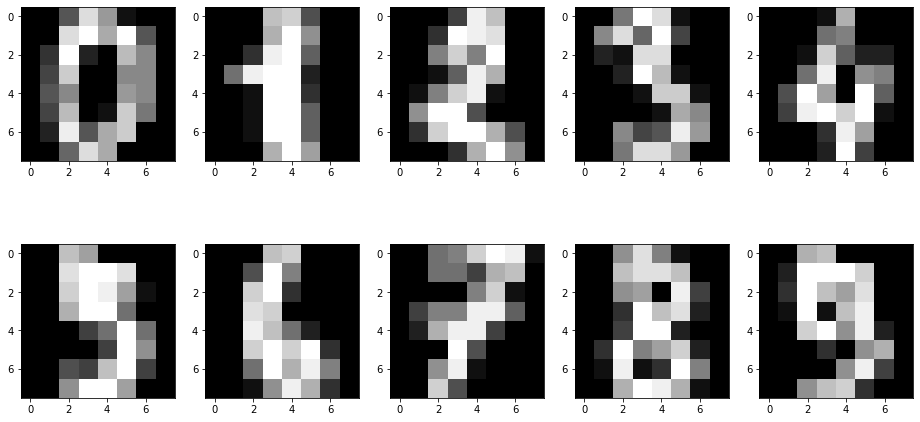

In [44]:
#############################
# Access and visualize data #
#############################

# Retrieve the sample data from sklearn
data = datasets.load_digits()
# Extract data and labels
X = data.images
y = data.target

# Visualize 10 sample images
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
for i in range(10):  
  plt.subplot(2,5, i+1)
  plt.imshow(X[i], cmap=plt.get_cmap('gray'))
plt.show() 

In [45]:
##########################
# Prep data for modeling #
##########################

# Vectorize data to pass it to a model
X = X.reshape(1797, 64)
X = X.astype('float32')
X /= 255

# Conduct the Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state, stratify = y)

# Check the shape of the training / testing data
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (1257, 64)
Y_train: (1257,)
X_test:  (540, 64)
Y_test:  (540,)


In [48]:
############################
# Running the GridSearchCV #
############################

# Defining parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid', 'rbf']} 

# Create the grid search object
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', refit=True, cv = 5, verbose=3, n_jobs=-1)
# n_jobs indicates number of cores will be used to run processes in parallel, -1 means use all cores

# Now that the grid search object has been created, we will fit it to the trainin set
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid', 'rbf']},
             scoring='accuracy', verbose=3)

In [52]:
########################
# Checking the outputs #
########################

# print best parameter after tuning 
print('The best hyper-parameters for an SVM on the sklearn digits dataset are: \n' + str(grid.best_params_)) 
grid_predictions = grid.predict(X_test) 
   
# print the best accuracy (metric passed in refit) for all of the models 
print(grid.best_score_)

# To get a robust view of the outcomes of the GridSearchCV, we can export the results to a pandas df
resultsDF = pd.DataFrame(grid.cv_results_)
# For the sake of easy comparison, we'll sort the dataframe
resultsDF = resultsDF.sort_values('rank_test_score')
resultsDF

# In this dataframe, the important columns to look at are:
# rank_test_score, mean_test_score, and params
# The rank_test_score (name may vary depending on your decision metric), will indicate the order of most accurate models as indicated by the decision metric, in this case, accuracy.
# The mean_test_score provides the average score for the decision metric across all of the folds
# And finally, the params indicates which hyper-parameters were used for that model

The best hyper-parameters for an SVM on the sklearn digits dataset are: 
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.9824922532093847


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.044999,0.010991,0.027002,0.007239,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.988095,0.984127,0.984064,0.992032,0.964143,0.982492,0.009636,1
30,0.046198,0.010457,0.013002,0.003032,100,1,sigmoid,"{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}",0.984127,0.976190,0.988048,0.984064,0.964143,0.979314,0.008508,2
21,0.057998,0.012978,0.040600,0.004841,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.972222,0.968254,0.996016,0.984064,0.952191,0.974549,0.014807,3
33,0.066201,0.018301,0.045398,0.013836,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.968254,0.972222,0.996016,0.984064,0.952191,0.974549,0.014807,3
32,0.081397,0.016571,0.022006,0.007516,100,0.1,sigmoid,"{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.964286,0.960317,0.988048,0.980080,0.944223,0.967391,0.015389,5
20,0.067767,0.015333,0.021801,0.008158,10,1,sigmoid,"{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}",0.964286,0.960317,0.988048,0.980080,0.944223,0.967391,0.015389,5
11,0.136001,0.022743,0.061399,0.001358,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.924603,0.888889,0.924303,0.928287,0.888446,0.910906,0.018212,7
23,0.133601,0.007059,0.073600,0.018381,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.920635,0.888889,0.924303,0.928287,0.888446,0.910112,0.017676,8
35,0.140799,0.012827,0.068402,0.010013,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.920635,0.888889,0.924303,0.928287,0.888446,0.910112,0.017676,8
22,0.204398,0.051228,0.030202,0.008750,10,0.1,sigmoid,"{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.817460,0.773810,0.816733,0.848606,0.749004,0.801122,0.035292,10
